In [1]:
import spacy
import timeit
import math
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from collections import Counter
from lxml import etree
from glob import glob
from unicodedata import normalize
import unidecode
import seaborn as sns 

In [2]:
nlp = spacy.load('fr_core_news_lg')

In [3]:
nlp.max_length = 2000000

In [4]:
coef_fabula = pd.read_csv(r'results_svm/coefs_1000_fabula.csv', index_col='Unnamed: 0')

In [5]:
coef_fabula = pd.read_csv(r'results_svm/coefs_3000_fabula.csv', index_col='Unnamed: 0')

In [6]:
coef_fabula.sort_values(by = 'coefs', inplace=True)

In [7]:
len(coef_fabula)

3000

In [8]:
coef_canon_df = coef_fabula[:500]

In [9]:
coef_non_canon_df = coef_fabula[2500:]

In [10]:
def clean_text(txt):
    txt_res = normalize("NFKD", txt.replace('\xa0', ' '))
    txt_res = txt_res.replace('\\xa0', '')
    return txt_res

### Try approche tous les coefs 
### Sinon 300 de coefs canon et coefs non-canon

In [11]:
def get_chunks_scores(path, df_coef, n):
    score = 0
    list_lemma = []
    str_base = ' '
    
    with open(path, encoding="utf8") as file:
        txt_brut = file.readlines()
        txt_str = str_base.join(txt_brut)
        txt_cleaned = clean_text(txt_str.lower())
    docs = nlp(txt_cleaned)
    for token in docs:
        list_lemma.append(token.lemma_)
    list_chunks = chunkise(list_lemma, n)
    return compute_score(list_chunks, df_coef)

In [12]:
def chunkise(list_token, n):
    list_chunks = []
    for i in range(0, len(list_token)-n, n):
        list_chunks.append(list_token[i:i+n])
    return list_chunks

In [13]:
def compute_score(list_chunks, df_coef):
    list_scores = []
    for chunk in list_chunks:
        score = 0
        for lemma in chunk:
            if lemma in list(df_coef.index):
                temp_score = coef_fabula.loc[coef_fabula.index == lemma]
                score += temp_score.values[0][0]
        list_scores.append(score)
    return list_scores

In [14]:
def signal_canon(path_name, n_token_per_chunk, df_coef):
    
    df_main = pd.DataFrame()

    for doc in glob(path_name):
        
        doc_name = path.splitext(path.basename(doc))[0]
        print(doc_name)
        
        list_scores = get_chunks_scores(doc, df_coef, n_token_per_chunk)
        print(pd.Series(list_scores).mean())
        df_main[doc_name] = pd.Series(list_scores)
    
    return df_main.fillna(0)


In [15]:
n_token_per_chunk = 500

In [16]:
path_name = r'corpus_test/*.txt'

In [44]:
df_scores = signal_canon(path_name, n_token_per_chunk, coef_fabula)

1872_Poisle-Desgranges-Joseph_Roman-d-une-mouche
-1.501378227222257
1869_Flaubert-Gustave_L-Education-sentimentale
2.8321025836977043


In [45]:
df_scores

,1872_Poisle-Desgranges-Joseph_Roman-d-une-mouche,1869_Flaubert-Gustave_L-Education-sentimentale
0,-3.647754,3.520639
1,-4.897350,7.949382
2,0.025977,10.651157
3,2.426909,-1.123467
4,-2.602712,1.657613
...,...,...
75,3.715999,4.242361
76,-2.865169,1.417239
77,2.942082,1.501140
78,-0.531909,0.843756


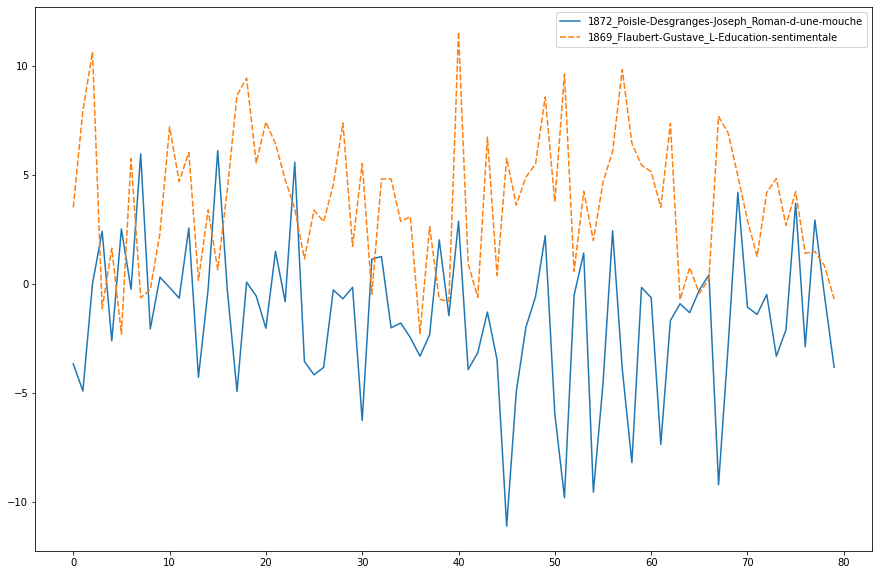

In [46]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(data=df_scores)

In [28]:
df_scores.drop(["1872_Lamothe-Alexandre-de_Le-Taureau-des-Vosges"], axis=1, inplace=True)

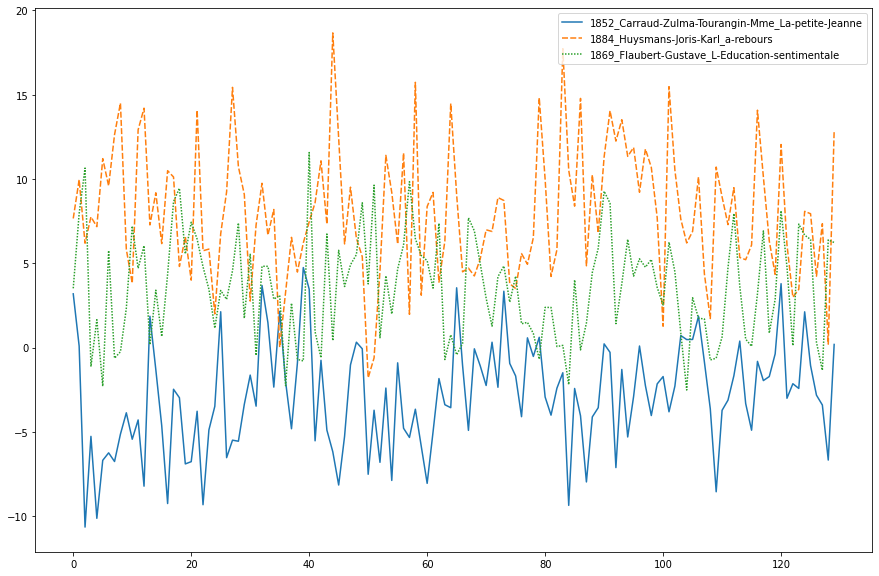

In [61]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(data=df_scores)

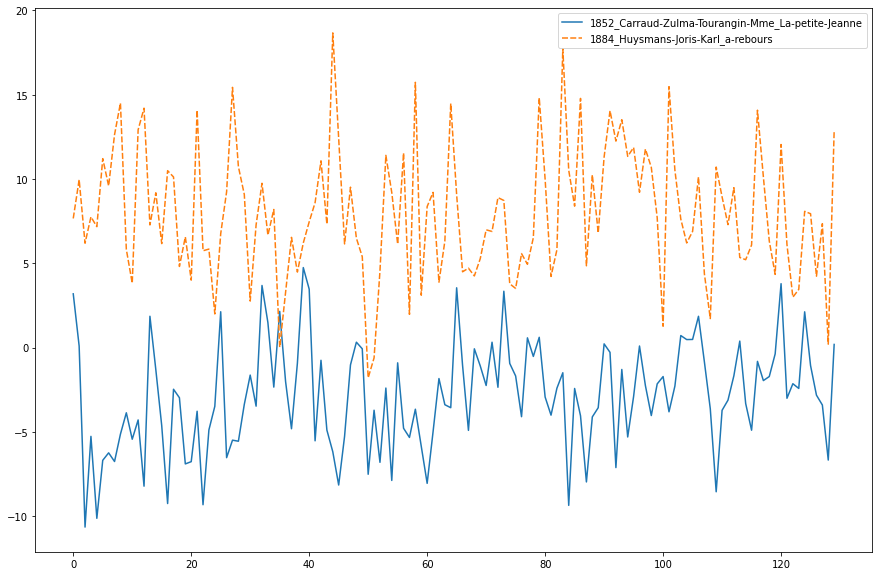

In [77]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(data=df_scores)

In [35]:
df_scores['1869_Flaubert-Gustave_L-Education-sentimentale'].max()

1.103144324447758

In [39]:
extrait_max = df_scores[df_scores['1869_Flaubert-Gustave_L-Education-sentimentale'] == 1.103144324447758]

In [40]:
extrait_max

,1872_Poisle-Desgranges-Joseph_Roman-d-une-mouche,1869_Flaubert-Gustave_L-Education-sentimentale
40,0.55524,1.103144


In [ ]:
# passage 41

In [36]:
df_scores['1872_Poisle-Desgranges-Joseph_Roman-d-une-mouche'].min()

-1.2968366564466203

In [37]:
extrait_min = df_scores[df_scores['1872_Poisle-Desgranges-Joseph_Roman-d-une-mouche'] == -1.2968366564466203]

In [38]:
extrait_min

,1872_Poisle-Desgranges-Joseph_Roman-d-une-mouche,1869_Flaubert-Gustave_L-Education-sentimentale
58,-1.296837,0.680988


In [56]:
# passage 59

In [17]:
def get_chunk_n(path, n, passage_n):
    score = 0
    list_token = []
    str_base = ' '
    
    with open(path, encoding="utf8") as file:
        txt_brut = file.readlines()
        txt_str = str_base.join(txt_brut)
        txt_cleaned = clean_text(txt_str.lower())
    docs = nlp(txt_cleaned)
    for token in docs:
        list_token.append(token.text)
    list_chunks = chunkise(list_token, n)
    
    return str_base.join(list_chunks[passage_n])

In [18]:
path_name = r'corpus_test/1869_Flaubert-Gustave_L-Education-sentimentale.txt'

In [19]:
get_chunk_n(path_name, 500, 41)

'sous d’ idées ; mais , sans l’ idée , rien de grand ! sans grandeur , pas de beau ! l’ olympe est une montagne ! le plus crâne monument , ce sera toujours les pyramides . mieux vaut l’ exubérance que le goût , le désert qu’ un trottoir , et un sauvage qu’ un coiffeur ! frédéric , en écoutant ces choses , regardait mme arnoux . elles tombaient dans son esprit comme des métaux dans une fournaise , s’ ajoutaient à sa passion et faisaient de l’ amour.il était assis trois places au - dessous d’ elle , sur le même côté. de temps à autre , elle se penchait un peu , en tournant la tête pour adresser quelques mots à sa petite fille ; et , comme elle souriait alors , une fossette se creusait dans sa joue , ce qui donnait à son visage un air de bonté plus délicate.au moment des liqueurs , elle disparut . la conversation devint très libre ; m. arnoux y brilla , et frédéric fut étonné du cynisme de ces hommes . cependant , leur préoccupation de la femme établissait entr

In [20]:
path_name = r'corpus_test/1872_Poisle-Desgranges-Joseph_Roman-d-une-mouche.txt'

In [21]:
get_chunk_n(path_name, 500, 59)

'j’ ai vu quelques personnes rassemblées devant une affiche . l’ une d’ elles lisait tout haut .   voici ce que contenait l’ affiche :   « récompense honnête à quiconque rapportera un portefeuille perdu , lequel renferme les papiers de famille d’ un général . »   et l’ on donnait pour adresse celle du concierge de la maison où nous demeurons .   — ah ! si j’ avais trouvé ce portefeuille ! fit le mari .   — qu’ en auras - tu fait ? demanda la femme .   — je me serais empressé de le rendre au général sans vouloir de la récompense promise . c’ eut été une occasion favorable pour lui demander le nom de notre bienfaiteur .   xvii . — la famille ricard .   une cage contenant des animaux féroces doit être moins dégoûtante à décrire que le chenil sale et fétide où vivaient les voisins de la famille pauvre .   si je retrace ce chenil au lecteur , c’ est que je l’ ai vu , et que dans le chapitre du juge nous avons déjà eu une ébauche des époux ricard .   le juge n’ avai